In [1]:
import pandas as pd
import scipy.stats
import numpy as np

df = pd.read_csv('Pulsesurvey_New.csv')
df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Interest,Down,Hlthins4,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income
0,1962,2,1,4,4,2,0,3,2,2,...,1,1,1,2,2,2,2,1,-88,-88
1,1941,1,1,1,5,1,0,1,2,2,...,3,3,2,-99,2,2,2,2,-88,4
2,1951,2,1,1,4,3,0,3,2,2,...,3,2,2,2,2,2,2,1,-88,-99
3,1978,1,1,2,3,1,4,2,1,2,...,1,2,1,1,2,2,2,3,-99,3
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [78]:
indexNames = df[df['Getvacc'] == 3].index
indexNames2 = df[df['Getvacc'] == 2].index

df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)

df['binary']=df['Getvacc'].apply(lambda x: 0 if(x==4) else(1))
df['Birthyear_bins'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011])
df['Birthyear_codes'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011], labels=[1,2,3,4,5,6])
df

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
1,1941,1,1,1,5,1,0,1,2,2,...,-99,2,2,2,2,-88,4,1,"(1931, 1951]",1
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,1,"(1981, 1991]",5
6,1956,1,1,1,7,1,0,1,2,2,...,1,2,2,2,2,-88,4,1,"(1951, 1961]",2
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,1,"(1971, 1981]",4
10,1969,2,1,1,6,3,1,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,1,"(1961, 1971]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127253,1983,2,1,1,4,1,3,4,1,1,...,-88,-88,-88,-88,-88,-88,-88,0,"(1981, 1991]",5
127254,1973,1,1,1,6,1,0,1,1,2,...,-99,2,2,2,2,-88,8,1,"(1971, 1981]",4
127256,1962,1,1,1,7,1,0,1,1,2,...,2,2,1,2,2,-88,7,1,"(1961, 1971]",3
127257,1969,1,1,1,4,5,0,1,2,2,...,2,2,2,2,1,-88,4,1,"(1961, 1971]",3


In [79]:
df_new = df[(df['Education']>0) & (df['Expensdiff']>0) & (df['Income']>0) & (df['Maritalstatus']>0) & (df['Kindwork']>0) & (df['Numkid']>0) & (df['Tenure']>0)]
df_new

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,1,"(1971, 1981]",4
13,1982,2,1,4,3,1,5,4,2,2,...,1,2,2,2,3,-99,6,0,"(1981, 1991]",5
25,1981,2,1,1,4,1,2,1,1,2,...,2,2,2,2,2,-99,5,1,"(1971, 1981]",4
37,1973,1,2,1,4,1,1,1,2,2,...,2,2,1,2,2,-88,8,1,"(1971, 1981]",4
50,1979,2,1,2,6,3,1,1,2,2,...,-99,2,2,2,3,-99,4,1,"(1971, 1981]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127188,1961,2,1,2,7,2,1,1,2,2,...,2,2,2,1,2,-99,8,1,"(1951, 1961]",2
127192,1962,1,1,2,7,1,2,1,2,2,...,1,2,2,2,2,-99,8,1,"(1961, 1971]",3
127193,1965,2,1,2,6,3,1,1,2,2,...,2,2,1,2,3,-88,5,1,"(1961, 1971]",3
127222,1988,2,1,1,6,1,1,1,2,1,...,2,1,1,2,2,1,4,1,"(1981, 1991]",5


In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn import preprocessing

In [81]:
X = df_new[['Birthyear_codes', 'Income', 'Education']]
y = df_new["binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)
score = rf_clf.score(X_train,y_train)
print('Accuracy score for Random Forest Classifier: ', score)

Accuracy score for Random Forest Classifier:  0.8652943686006825


In [84]:
rf_predicted = rf_clf.predict(X_test)
print(classification_report(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       0.46      0.12      0.18       547
           1       0.88      0.98      0.92      3472

    accuracy                           0.86      4019
   macro avg       0.67      0.55      0.55      4019
weighted avg       0.82      0.86      0.82      4019



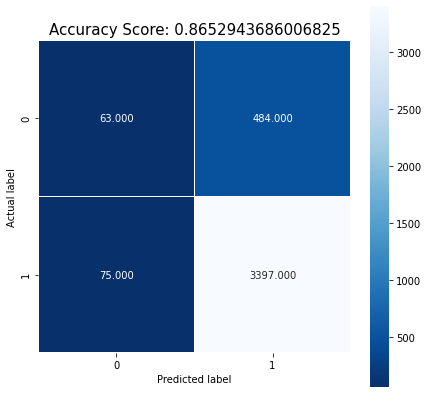

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test_enc, rf_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

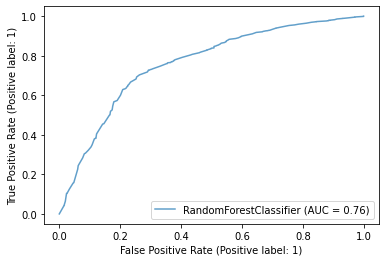

In [85]:
ax = plt.gca()
rf_clf_disp = plot_roc_curve(rf_clf, X_test_fs, y_test_enc, ax=ax, alpha=0.7)

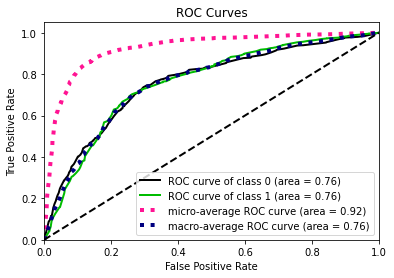

In [86]:
import scikitplot as skplt

plt.rcParams['figure.figsize'] = [6, 4]
predicted_probas = rf_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

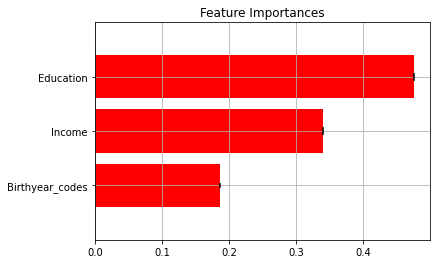

In [88]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)
feature_names = X.columns

plt.figure(figsize=(6,4))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.grid()
plt.show()